# AIML PROJECT

## Develop a multi linear regression model based on dataset to predict the insurance price.
## Target data(Y) - charges(Decimal) 
## input data(X) - age(Integer), sex(String), bmi(Decimal), children(Integer), smoker(String)
## Model can predict to accuracy >60%


In [1]:
#import required libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import tensorflow as tf
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
#read the insurance dataset
data = pd.read_csv('insurance.csv',header=0, skipinitialspace=True)

print(data.head(10))

#check for any missing values in dataset, there is none
print(data.isnull().values.any())
print(data.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692
False
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [38]:
#describe data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


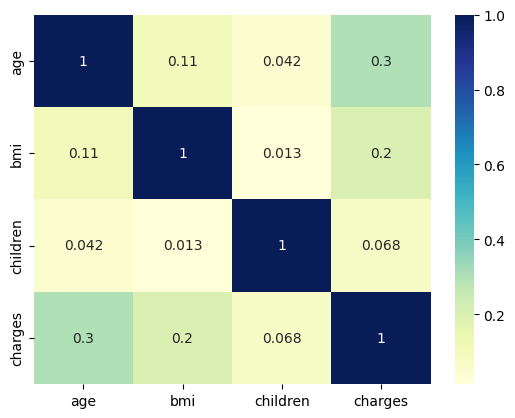

In [39]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [40]:
#Checking for labels in categorical variables
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['region'].unique())

#checking for label counts in categorical variables
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']
male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [41]:
#One-hot encoding the categorical variables to binary data using get_dummies()
df = pd.get_dummies(data, columns = ['sex','smoker','region'])
print(df)

#print(df.head(5))

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [42]:
#select input data and target data
X = df[['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
Y = df['charges']

print(X.shape)
print(Y.shape)

(1338, 11)
(1338,)


In [43]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [44]:
#Create multi-linear regression model
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, Y_train)

#Intercept is when function cross y-axis, when X = 0
print('Intercept: \n', lin_reg.intercept_)
print('Coefficients: \n', lin_reg.coef_)

Intercept: 
 3.411813442396965e+17
Coefficients: 
 [ 2.66222081e+02  3.29306067e+02  4.16046794e+02  6.13936153e+15
  6.13936153e+15 -3.48702004e+17 -3.48702004e+17  1.38129872e+15
  1.38129872e+15  1.38129872e+15  1.38129872e+15]


In [45]:
#Predict Y using X_test, find r2-value
Y_pred = lin_reg.predict(X_test)
r2_value = r2_score(Y_test, Y_pred)

# The coefficient of determination: 1 is perfect prediction
print('R-squared Coefficient of determination: %.3f' %r2_value)


R-squared Coefficient of determination: 0.759


In [46]:
#Find Mean Squared Error
from sklearn import metrics
print(metrics.mean_squared_error(Y_test,Y_pred))
#Print Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

37165600.26284915
6096.359591005861


In [47]:
#Finding out Adjusted R-squared value - measurement that counts for number of variables used for model
adjusted_r2 = 1 -( (1-r2_value) * (len(Y) - 1) / (len(Y)-11-1) )
print(adjusted_r2)


0.7570620727929197


In [48]:
result = lin_reg.predict(X_test[:10])
alldata = pd.DataFrame()
alldata['expected charges'] = pd.Series(Y_test[:10])
alldata['predict charges'] = result.reshape(-1)
print(alldata)

      expected charges  predict charges
338        41919.09700          35904.0
620         3659.34600           5504.0
965         4746.34400           5440.0
128        32734.18630          26368.0
329         9144.56500          12672.0
440         4738.26820           7040.0
1215       12890.05765           5632.0
387        30284.64294           9728.0
1037       39725.51805          33600.0
1015       12124.99240          11264.0


## Using neural network for multi linear regression

In [29]:
data = pd.read_csv('insurance.csv',header=0, skipinitialspace=True)

#One-hot encoding the categorical variables to binary data using get_dummies()
df = pd.get_dummies(data, columns = ['sex','smoker','region'])
#print(df)

#select input data and target data
X = df[['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
Y = df['charges']

print(X.shape)
print(Y.shape)

#Perfrom feature scaling
#scaler = preprocessing.StandardScaler()
#X = scaler.fit_transform(X)

(1338, 11)
(1338,)


In [30]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [31]:
# use minMax scaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [32]:
# build the model!
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear')) # output node
model.summary() 

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# early stopping callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# to look at the learning curves
history = model.fit(X_train, Y_train,
                    validation_data = (X_test, Y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=0)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              12000     
_________________________________________________________________
dense_20 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_21 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 251       
Total params: 638,001
Trainable params: 638,001
Non-trainable params: 0
_________________________________________________________________


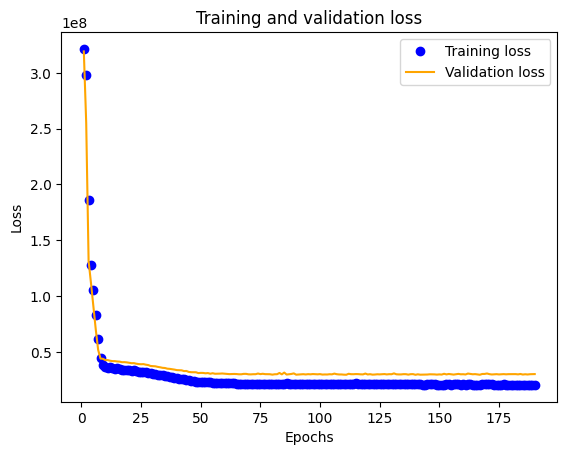

In [33]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

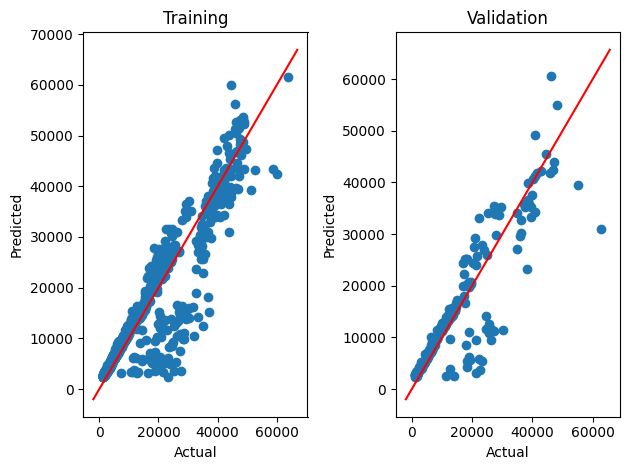

In [35]:

# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# Training Results
axes[0].scatter(x=Y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=Y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [36]:
# metrics
pred = model.predict(X_test)

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_train, trainpreds)) # train
print(mean_absolute_error(Y_test, pred)) # test

2813.9073964692757
3295.65827414354


In [38]:
#Predict Y using X_test, find r2-value
Y_pred = model.predict(X_test)
r2_value = r2_score(Y_test, Y_pred)

# The coefficient of determination: 1 is perfect prediction
print('R-squared Coefficient of determination: %.3f' %r2_value)

R-squared Coefficient of determination: 0.790


In [40]:
#Finding out Adjusted R-squared value - measurement that counts for number of variables used for model
adjusted_r2 = 1 -( (1-r2_value) * (len(Y) - 1) / (len(Y)-11-1) )
print(adjusted_r2)

0.7880179290573199


In [39]:
example_result = model.predict(X_test[:10])
#print(example_result.shape)
alldata = pd.DataFrame()
alldata['expected charges'] = pd.Series(Y_test[:10])
alldata['predict charges'] = example_result.reshape(-1)
print(alldata)

      expected charges  predict charges
7           7281.50560      9341.920898
999         5267.81815      6495.692383
1209       12347.17200     13997.212891
491        24513.09126     14220.414062
625         3736.46470      4944.833008
228         7358.17565      9510.674805
425         9788.86590     12291.068359
261        17085.26760     19946.966797
498         8211.10020      9675.833984
896        19798.05455     20741.687500


## Implementing Random Forest Regression

In [12]:
data = pd.read_csv('insurance.csv',header=0, skipinitialspace=True)

#One-hot encoding the categorical variables to binary data using get_dummies()
df = pd.get_dummies(data, columns = ['sex','smoker','region'])
#print(df)

#select input data and target data
X = df[['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
Y = df['charges']

print(X.shape)
print(Y.shape)

(1338, 11)
(1338,)


In [13]:
#Perfrom feature scaling
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [41]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [42]:
#Getting random forest regression model and fitting into training data
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
#build 100 trees
regressor = RandomForestRegressor(n_estimators = 100, random_state = 10)
  
# fit the regressor with x and y data
regressor.fit(X_train, Y_train) 

RandomForestRegressor(random_state=10)

In [43]:
#Intercept is when function cross y-axis, when X = 0
#print('Intercept: \n', regressor.intercept_)
#print('Coefficients: \n', regressor.coef_)

In [44]:
#Predict Y using X_test, find r2-value
Y_pred = regressor.predict(X_test)
r2_value = r2_score(Y_test, Y_pred)

# The coefficient of determination: 1 is perfect prediction
print('R-squared Coefficient of determination: %.3f' %r2_value)

R-squared Coefficient of determination: 0.838


In [45]:
#Find Mean Squared Error
from sklearn import metrics
print(metrics.mean_squared_error(Y_test,Y_pred))
#Print Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

24331669.34990873
4932.714197063187


In [46]:
#Finding out Adjusted R-squared value - measurement that counts for number of variables used for model
adjusted_r2 = 1 -( (1-r2_value) * (len(Y) - 1) / (len(Y)-11-1) )
print(adjusted_r2)

0.8366400896709087


In [47]:
rf_result = regressor.predict(X_test[:10])
alldata = pd.DataFrame()
alldata['expected charges'] = pd.Series(Y_test[:10])
alldata['predict charges'] = rf_result.reshape(-1)
print(alldata)

      expected charges  predict charges
17          2395.17155      3811.958777
1091       11286.53870     11753.716874
273         9617.66245     15800.075414
270         1719.43630      2222.651390
874         8891.13950     10375.051906
790         5662.22500      8340.591420
957        12609.88702      3317.595701
492         2196.47320      2962.970633
1125       14254.60820     19355.890703
794         7209.49180      7541.728130
